What is load_iris()? Training Wheels! Please let the AI overlords take over.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# New imports
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import time

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
titanic_df.drop("PassengerId", axis=1, inplace=True)
titanic_df.drop("Fare", axis=1, inplace=True)
titanic_df.drop("Age", axis=1, inplace=True)
# I have droped age.

I have chosen to drop age. This is because the data set is only a single order of magnitude larger than the expected age range. Another option was to put the age in to buckets, and for a future project where I take a closer look at  Number of Siblings/Spouses Aboard, and Number of Parents/Children Aboard, in relation to survival. That is what I will do.

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [6]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,SibSp,Parch,Embarked,Sex_female,Sex_male
0,0,3,1,0,S,False,True
1,1,1,1,0,C,True,False
2,1,3,0,0,S,True,False
3,1,1,1,0,S,True,False
4,0,3,0,0,S,False,True


Now, we do the same to the "Embarked" column.

In [8]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,False,True,False,False,True
1,1,1,1,0,True,False,True,False,False
2,1,3,0,0,True,False,False,False,True
3,1,1,1,0,True,False,False,False,True
4,0,3,0,0,False,True,False,False,True


Select relevant variables from the data and split the data into a training, development, and test set.

In [9]:
X = titanic_df.drop(columns=['Survived'])
Y = titanic_df['Survived']
features = X.columns
X.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,False,True,False,False,True
1,1,1,0,True,False,True,False,False
2,3,0,0,True,False,False,False,True
3,1,1,0,True,False,False,False,True
4,3,0,0,False,True,False,False,True


In [10]:
# the Ultimate Question of Life
X_train_dev, X_test, Y_train_dev, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train, X_dev, Y_train, Y_dev = train_test_split(X_train_dev, Y_train_dev, test_size=0.2, random_state=42)
X_train.shape

(569, 8)

This should be training, test and development. To help avoid things like overfitting. 

I didn't know this at the time and while I have gone back and amended the previous task, it does not greatly impact this task's instructions.

Train a decision tree and make a plot of it.

In [11]:
# Look. We have been through this. 42
clf = DecisionTreeClassifier(max_depth=None, random_state=42)
clf.fit(X_train, Y_train)
# default max_depth is None
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

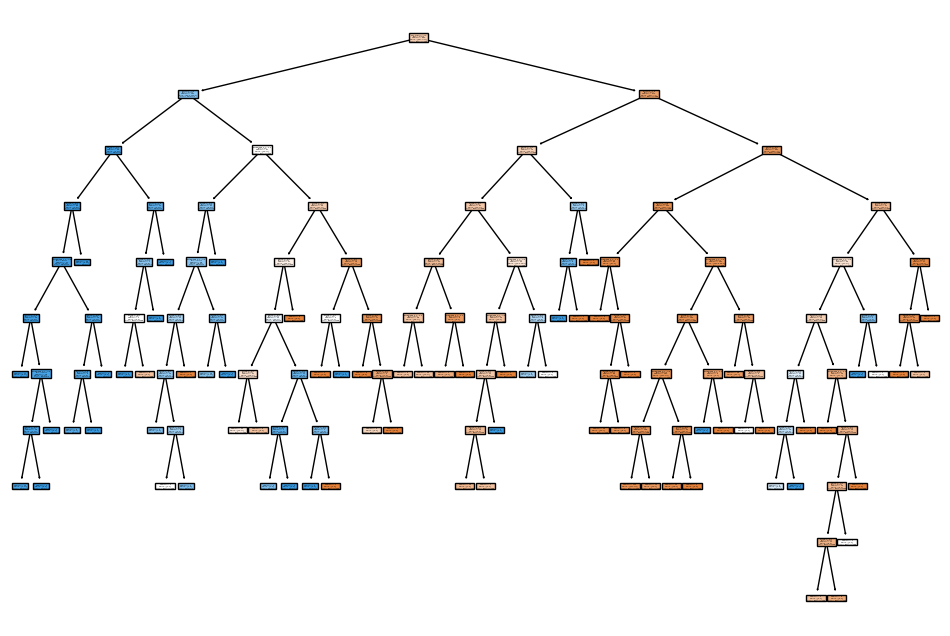

In [12]:
# And thw plot
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'])
plt.show()

Compute model’s accuracy on the development set.

In [13]:
print("Performance without pruning:", clf.score(X_test, Y_test))
print("At depth:", clf.tree_.max_depth)

Performance without pruning: 0.7988826815642458
At depth: 10


0.73 at death if 17 with the age.

Try building your model with different values of max_depth (2–10). At each step, create a plot of your tree and store the accuracies on both the training and development data.

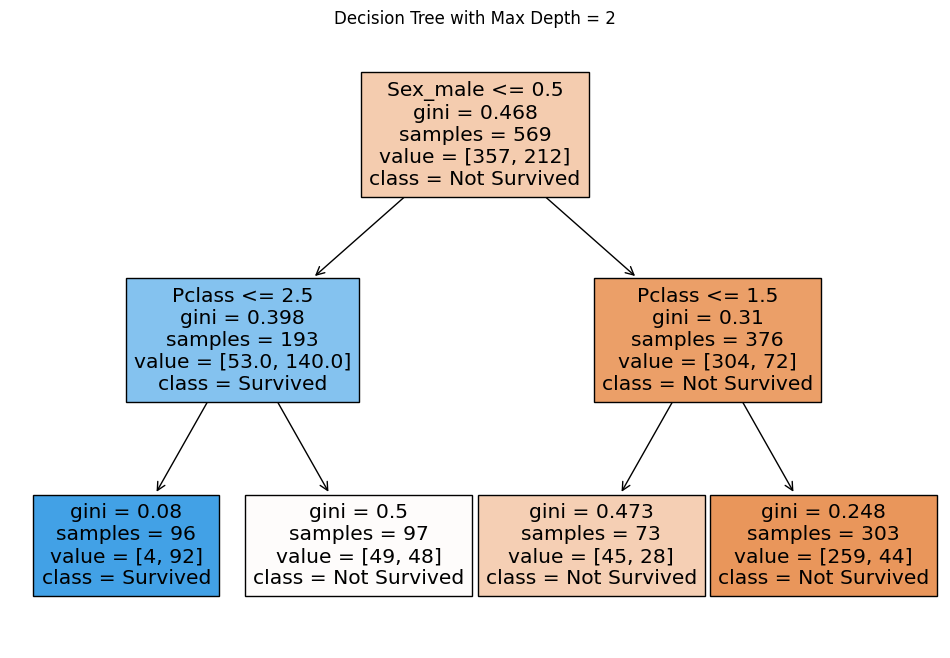

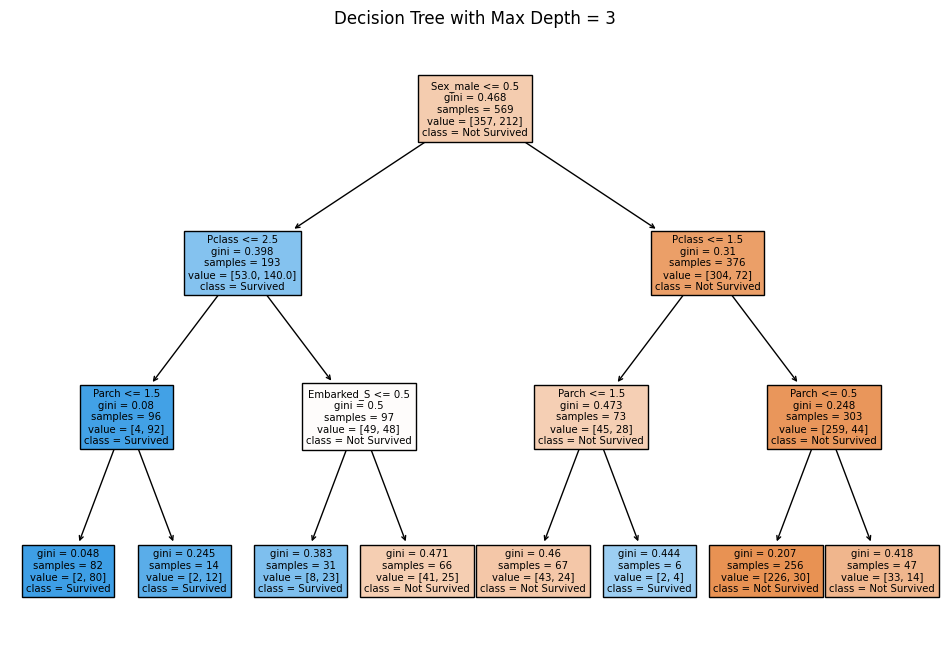

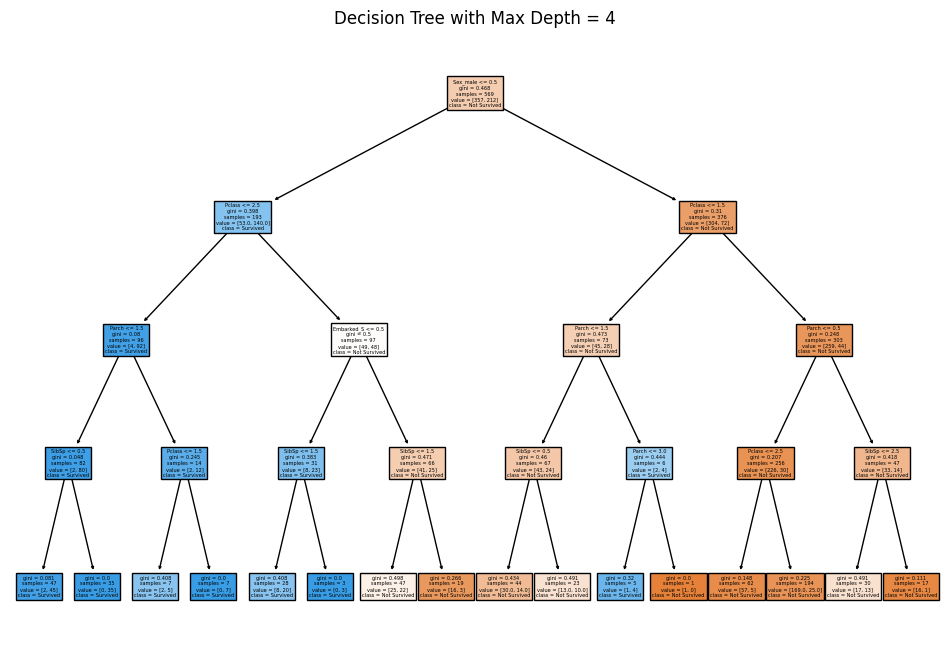

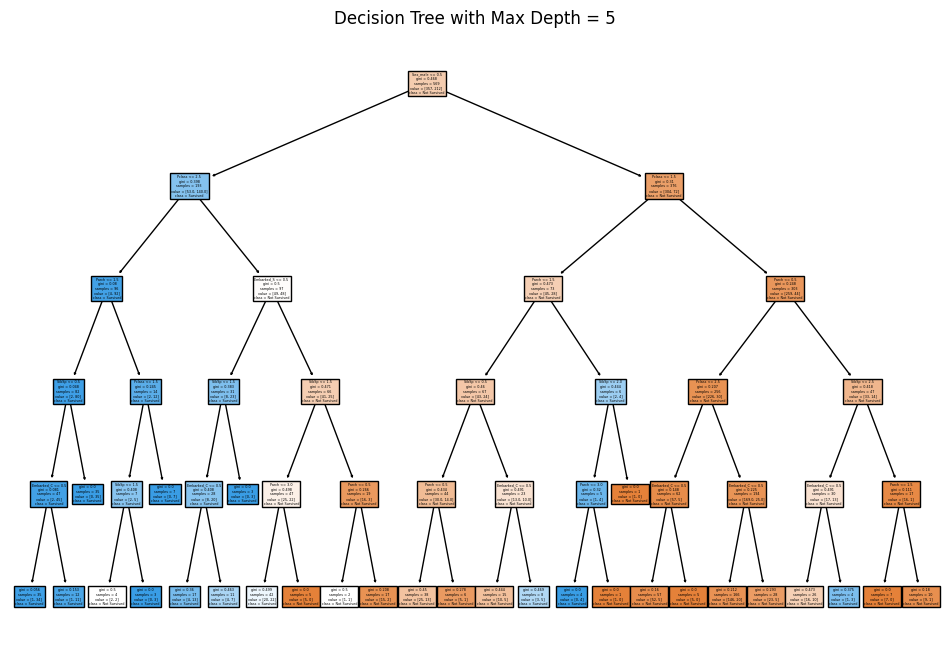

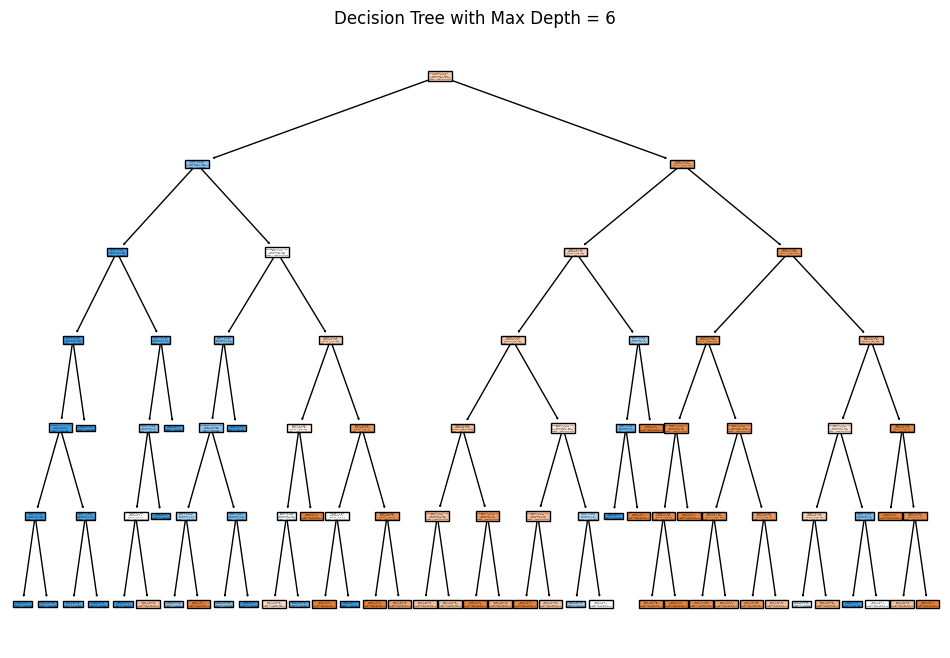

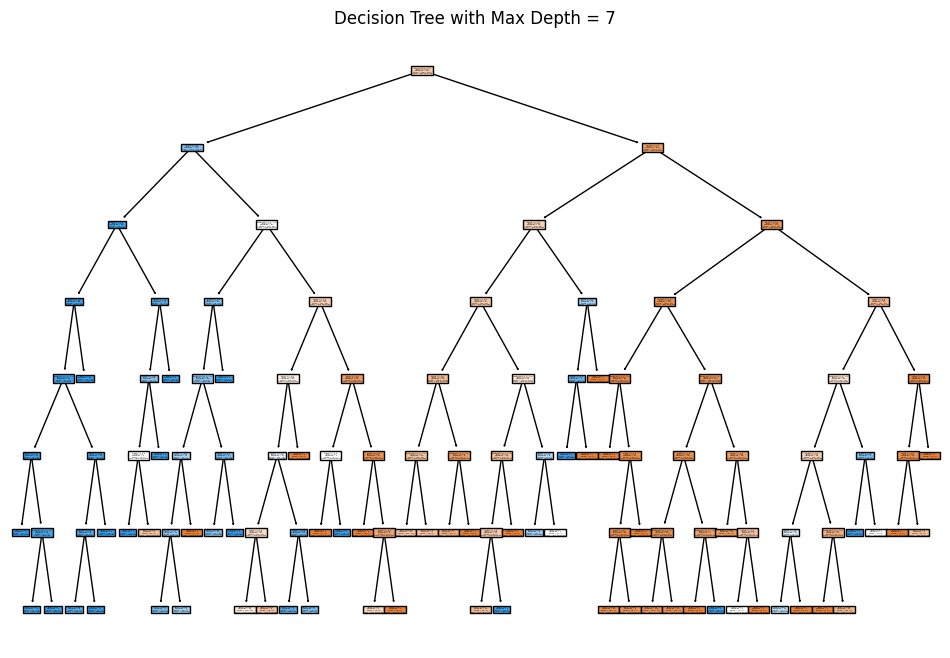

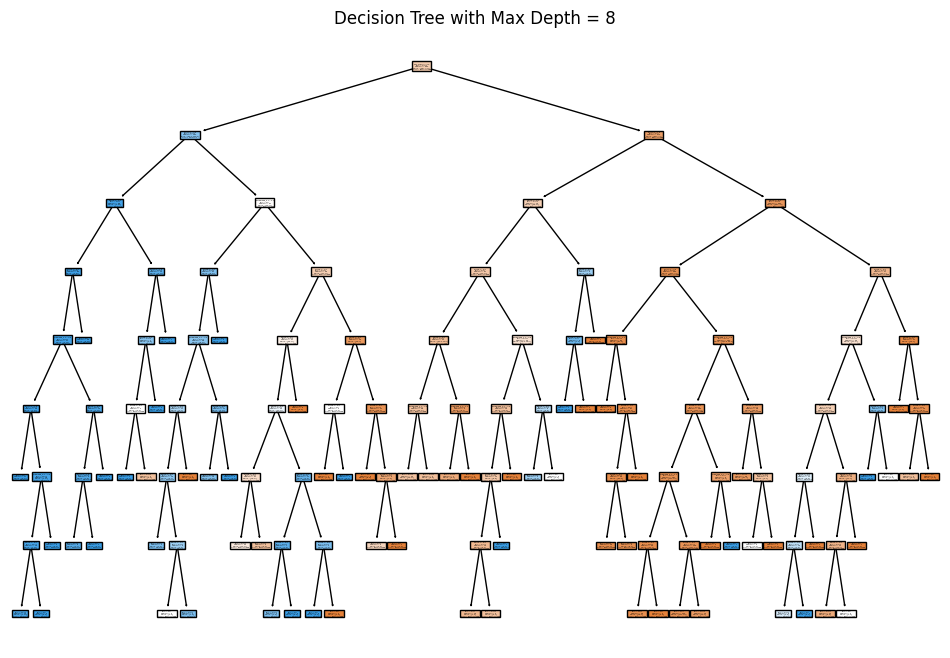

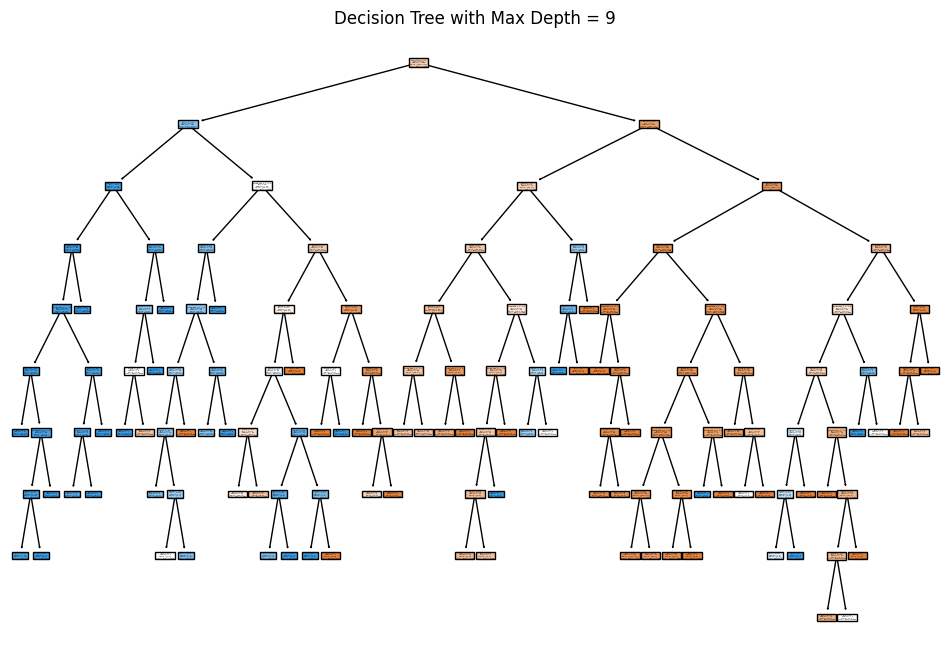

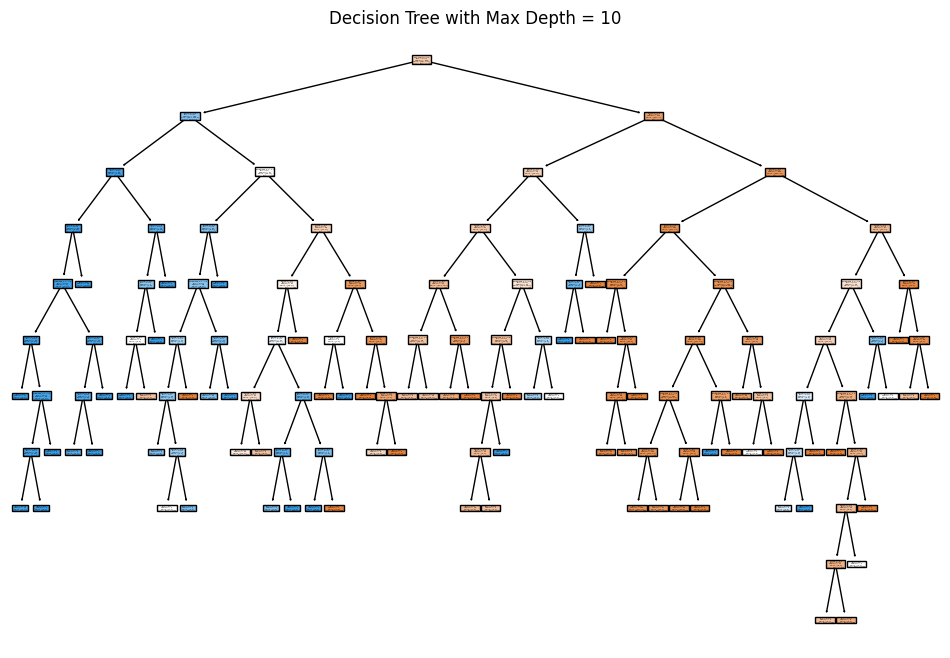

In [14]:
depths_score_t = []
depths_score_d = []
for i in range(2, 11):
    n = DecisionTreeClassifier(max_depth=i, random_state=42)
    n.fit(X_train, Y_train)

    train_p = n.predict(X_train)
    dev_p = n.predict(X_dev)

    train_accurcay = accuracy_score(Y_train, train_p)
    dev_accurcay = accuracy_score(Y_dev, dev_p)
    depths_score_t.append(train_accurcay)
    depths_score_d.append(dev_accurcay)
    
    plt.figure(figsize=(12, 8))
    plot_tree(n, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'])
    plt.title(f'Decision Tree with Max Depth = {i}')
    plt.show()

In [15]:
test = DecisionTreeClassifier(max_depth=4, random_state=42)
test.fit(X_train, Y_train)
test.score(X_test, Y_test)

0.7932960893854749

Plot a line of your training accuracies and another of your development accuracies in the same graph. Write down what shape the lines have and what this shape means

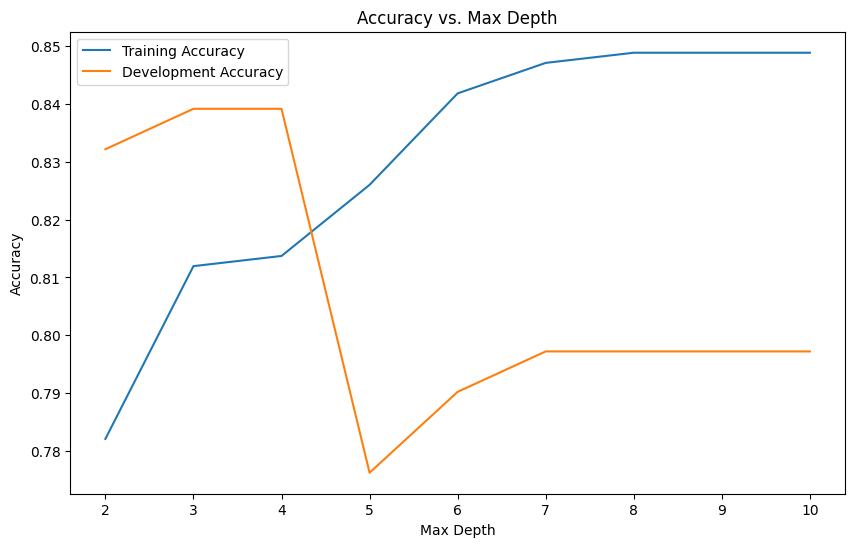

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), depths_score_t, label='Training Accuracy')
plt.plot(range(2, 11), depths_score_d, label='Development Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Depth')
plt.legend()
plt.show()

Report the accuracy of your final model on the test data

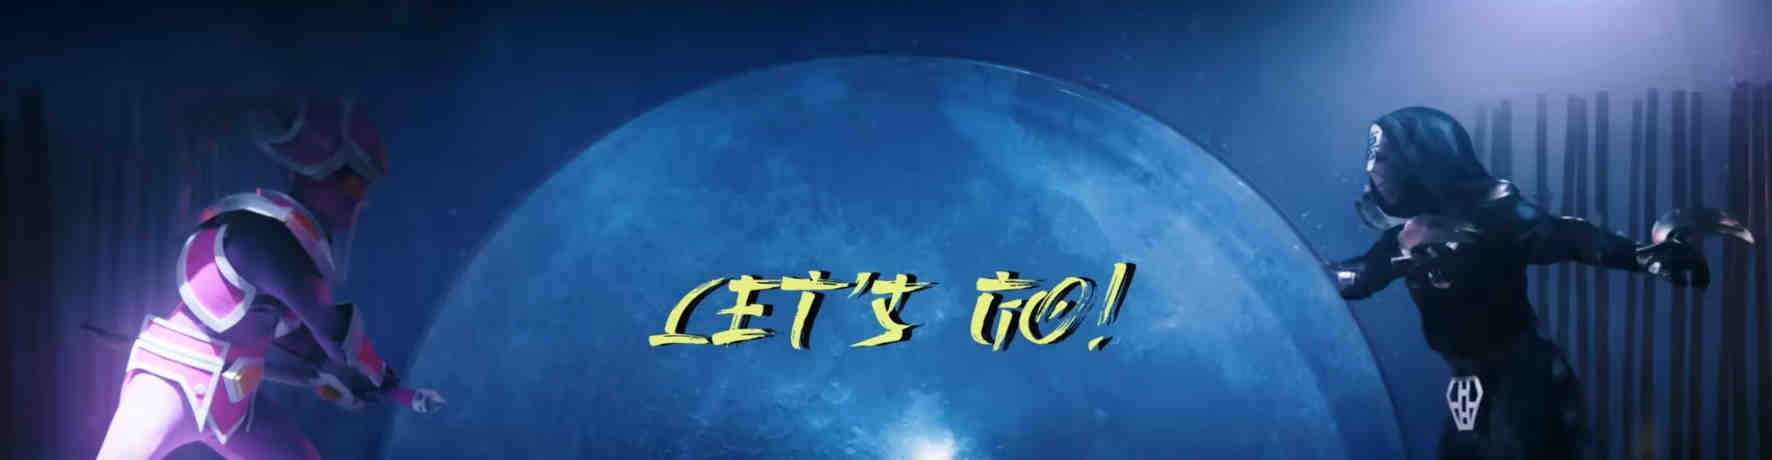

Continue with the Decision Trees task

Create a bagged, random forest, and boosted tree for the Titanic data set in the same way that you created a regular classification tree

In [17]:
# Been told it should be y not Y
y_test = Y_test
y_train = Y_train

In [18]:
bagged = BaggingClassifier(n_estimators=100, random_state=42)
bagged.fit(X_train, y_train)
bagged_score = bagged.score(X_test, y_test)
#print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",bagged_score)

Accuracy ensemble: 0.8044692737430168


In [19]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
forest_score = forest.score(X_test, y_test)
#Fare have now been popped. 
print("Accuracy ensemble:",forest_score)

Accuracy ensemble: 0.7988826815642458


In [20]:
# AdaBoostClassifier in scikit-learn, is deprecated and will be removed in future versions of scikit-learn (version 1.6).
boosted = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42)
boosted.fit(X_train, y_train)
boosted_score = boosted.score(X_test, y_test)
print("Accuracy ensemble:",boosted_score)

Accuracy ensemble: 0.7877094972067039


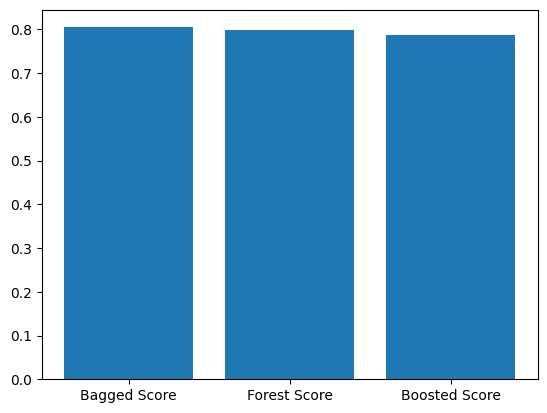

In [21]:
x_axe = ["Bagged Score","Forest Score","Boosted Score"]
y_axe = [bagged_score, forest_score, boosted_score]
plt.bar(x_axe, y_axe)
plt.show()

In [22]:
# I need to get some pointers from https://informationisbeautiful.net/
# Looks like I need a custom module. 
for i, j in zip(x_axe, y_axe):
    print(i, j)

Bagged Score 0.8044692737430168
Forest Score 0.7988826815642458
Boosted Score 0.7877094972067039


From the random forest model, determine which of the features is the one that contributes the most to predicting whether a passenger survives or not.

In [23]:
pd.Series(forest.feature_importances_).sort_values(ascending=False)

3    0.254945
0    0.211733
4    0.201247
2    0.139657
1    0.135400
7    0.023789
5    0.021284
6    0.011944
dtype: float64

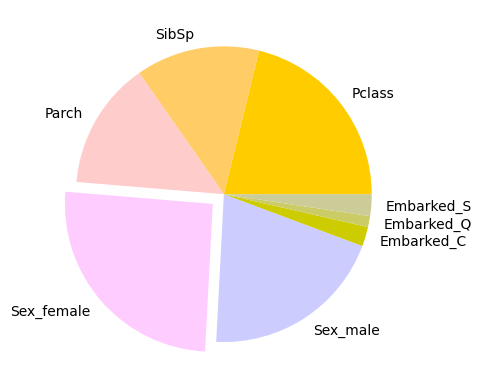

In [24]:
colors = ['#FFCC00', '#FFCC66', '#FFCCCC', '#FFCCFF', '#CCCCFF', '#CCCC00', '#CCCC66', '#CCCC99']
y_axe_f = (pd.Series(forest.feature_importances_)).to_numpy()
plt.pie(y_axe_f, labels = features, explode = [0, 0, 0, 0.1, 0, 0, 0, 0], colors = colors)
# What is features I here you say. It's an example of bad programme. 
plt.show()

Sex Female contributes the most to predicting. Second is Sex Male, but with this data set there are no other options for sex, so Sex Male could be dropped. Class is the third in contributors.

Pick one of these methods, and tune the parameters n_estimators and max_depth.

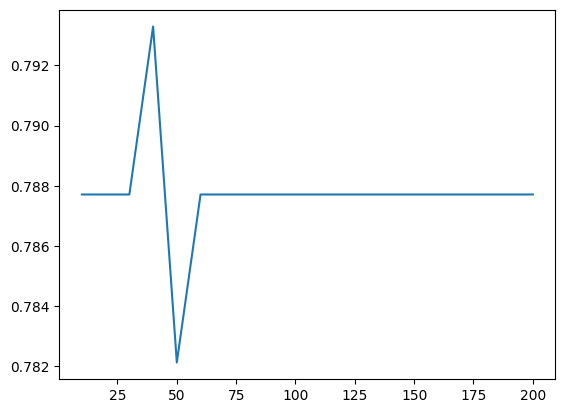

Best accuracy: 0.7932960893854749
Best n_estimators: 40


In [25]:
# Using AdaBoostClassifier
best_accuracy = 0
best_n_estimator = 0
# More graphs. Guess so
array_a = []
array_e = []

for n_estimators in range(10, 201, 10):
    model = AdaBoostClassifier(n_estimators = n_estimators, algorithm = 'SAMME', random_state = 42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, pred)
    array_a.append(accuracy)
    array_e.append(n_estimators)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimator = n_estimators
            

# ig = plt.figure(facecolor="black", edgecolor="black")
# fig.patch.set_facecolor('black')

plt.plot(array_e, array_a) 
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.show()
print("Best accuracy:", best_accuracy)
print("Best n_estimators:", best_n_estimator)
# for some reason I could make the background of the graph black

AdaBoostClassifier doesn't have a max_death. Okay next one

In [28]:
# RandomForest
best_accuracy = 0
best_n_estimators = 0
best_max_depth = 0
start = time.time()
for n_estimators in range(10, 201, 10):
    for max_depth in range(2, 11):
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_estimators = n_estimators
            best_max_depth = max_depth
end = time.time()
print("Best accuracy:", best_accuracy)
print("Best n_estimators:", best_n_estimators)
print("Best max_depth:", best_max_depth)

Best accuracy: 0.8156424581005587
Best n_estimators: 10
Best max_depth: 10


In [29]:
# O(n^2)?
print(f"Time for the RandomForest: {end - start}")

Time for the RandomForest: 20.512030839920044


Report the accuracy of all models and report which model performed the best, including the values for n_estimators and max_depth that the best model had.

BaggingClassifier had the best performed at unset max_depth. However RandomForestClassifier with best n_estimaters and best max_depth out performed the unset BaggingClassitier. AdaBoostClassifier remained the lowist scoring.

RandomForestClassifier best setting for n_estimators and max_depth is 10 for both. The n_estimators only goes down to 10.

Note: There remains the danger of overfitting for these models. See, I am paying attention, sometimes.

In [35]:
forest = RandomForestClassifier(n_estimators=10, random_state=42)
forest.fit(X_train, y_train)
forest_score = forest.score(X_test, y_test)
print("Accuracy ensemble:",forest_score)

Accuracy ensemble: 0.8044692737430168


In [36]:
bagged = BaggingClassifier(n_estimators=10, random_state=42)
bagged.fit(X_train, y_train)
bagged_score = bagged.score(X_test, y_test)
print("Accuracy ensemble:",bagged_score)

Accuracy ensemble: 0.8100558659217877


It would seem on this data set we are getting a better score with a lower n_estimators. Is this the phenomena "underfitting" and "overfitting" again.